In [1]:
import nltk
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji
import matplotlib.pyplot as plt





In [2]:
df = pd.read_csv('output.csv')

In [3]:
df.head()

,comment
0,"Always good food from Hoagies, love their chic..."
1,Fried pickles and honey mayo - amazing
2,Great value and yummy food. Falafal burger was...
3,Yummy
4,The food is consistently excellent and the sta...


In [4]:
df.shape

(72736, 1)

In [5]:
# detect rows with missing reviews
df.isnull().sum()

comment    0
dtype: int64

In [6]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove whitespaces
    text = text.strip()
    return text
    
    

In [7]:
def tokenize(text):
    # split the text into individual words
    return text.split()

In [8]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    #Remove common words that usually don’t carry important meaning.
    return [word for word in tokens if not word in stop_words]

In [9]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

In [10]:
def rejoin_tokens(tokens):
    return ' '.join(tokens)

In [11]:
def remove_emojis(text):
    # Remove emojis from the text
    cleaned_text = emoji.demojize(text)
    return cleaned_text

In [12]:
positive_words = set(["legend","good", "excellent", "awesome", "amazing", "fantastic", "finest", "fantastic", "quick"])

# Function to adjust sentiment based on positive words
def adjust_sentiment_based_on_positive_words(text, sentiment_score):
    # Check if any positive words are present in the text
    if any(word in text for word in positive_words):
        # Increase the sentiment score (adjust as needed)
        sentiment_score += 0.1
    return sentiment_score

In [13]:
def preprocess_pipeline(text):
    # Chain your preprocessing functions
    text = clean_text(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_tokens(tokens)
    text = rejoin_tokens(tokens)
    text = remove_emojis(text)
    return text



In [14]:
# Apply the preprocessing pipeline to your text column
df['cleaned_review'] = df['comment'].apply(preprocess_pipeline)

In [15]:
df

,comment,cleaned_review
0,"Always good food from Hoagies, love their chic...",always good food hoagy love chicken burger fry...
1,Fried pickles and honey mayo - amazing,fried pickle honey mayo amazing
2,Great value and yummy food. Falafal burger was...,great value yummy food falafal burger yum reco...
3,Yummy,yummy
4,The food is consistently excellent and the sta...,food consistently excellent staff always reall...
...,...,...
72731,Really enjoyed our food. All freshly made and ...,really enjoyed food freshly made tasty ready q...
72732,This place is rotten 12inch munchie box in bin...,place rotten inch munchie box bin plus menu bo...
72733,What a gem of a takeaway. Food always hot and ...,gem takeaway food always hot delicious staff a...
72734,Fantastic !South indian garlic chilli is th...,fantastic south indian garlic chilli best bett...


In [16]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment and create a new column
df['sentiment_score'] = df.apply(lambda row: sia.polarity_scores(row['cleaned_review'])['compound'], axis=1)

# Adjust sentiment based on positive words
df['sentiment_score'] = df.apply(lambda row: adjust_sentiment_based_on_positive_words(row['cleaned_review'], row['sentiment_score']), axis=1)
# Define a function to label sentiments
def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column with sentiment labels
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

In [17]:
df[df['sentiment_label']== 'neutral'].sample(10)

,comment,cleaned_review,sentiment_score,sentiment_label
43463,Tiny bits of GLASS in my DAUGHTER'S Pizza!!!,tiny bit glass daughter pizza,0.0000,neutral
63122,The first in the world of shawarma,first world shawarma,0.0000,neutral
5874,Banging food,banging food,0.0000,neutral
70690,"Working away and tried here , quality food and...",working away tried quality food service,0.0000,neutral
67432,I not be back,back,0.0000,neutral
11483,What a man,man,0.0000,neutral
18644,Fish supper 2 large pieces of fish alot of chips,fish supper large piece fish alot chip,0.0000,neutral
57953,The food is good but The delivery service is r...,food good delivery service really poor take ro...,-0.0263,neutral
63219,Opens much earlier than other places. So that'...,open much earlier place thats handy,0.0000,neutral
71170,Wouldn't go anywhere else.,wouldnt go anywhere else,0.0000,neutral


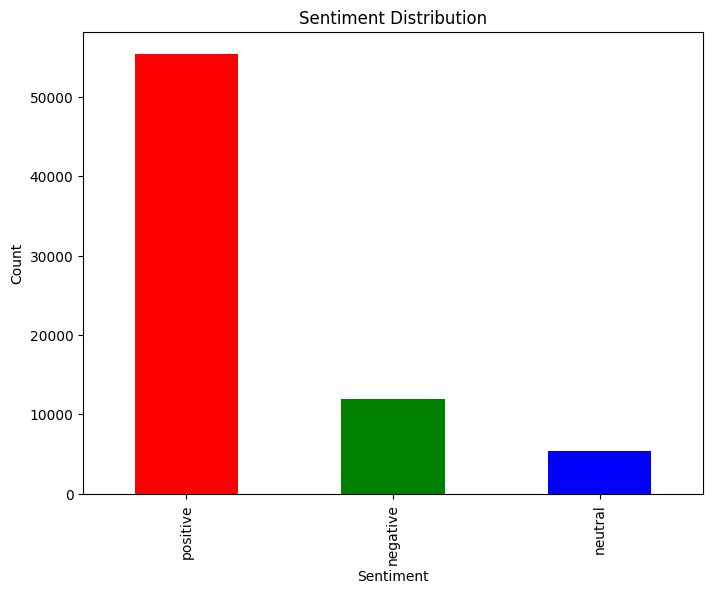

In [18]:
# Count the occurrences of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [19]:
# Calculate the percentage of each sentiment label
sentiment_percentages = sentiment_counts / len(df) * 100

# Display the percentage breakdown
print("Sentiment Percentage Breakdown:")
print(sentiment_percentages)

Sentiment Percentage Breakdown:
sentiment_label
positive    76.147987
negative    16.437527
neutral      7.414485
Name: count, dtype: float64


In [20]:
import seaborn as sns

In [21]:
piechart = df['sentiment_label'].value_counts()
piechart


sentiment_label
positive    55387
negative    11956
neutral      5393
Name: count, dtype: int64

In [22]:
positive = df['sentiment_label'][df['sentiment_label'] == "positive"].count()
negative = df['sentiment_label'][df['sentiment_label'] == "negative"].count()
neutral = df['sentiment_label'][df['sentiment_label'] == "neutral"].count()

In [23]:
counts = [positive,negative, neutral]

In [24]:

group = ['positive','negative', "neutral"]

In [25]:
import plotly.express as px


In [26]:
df.columns

Index(['comment', 'cleaned_review', 'sentiment_score', 'sentiment_label'], dtype='object')

In [36]:
df["cleaned_review"][df['sentiment_label']  == "positive"]

0        always good food hoagy love chicken burger fry...
1                          fried pickle honey mayo amazing
2        great value yummy food falafal burger yum reco...
3                                                    yummy
4        food consistently excellent staff always reall...
                               ...                        
72730    far best indian ever first time ordering assur...
72731    really enjoyed food freshly made tasty ready q...
72733    gem takeaway food always hot delicious staff a...
72734    fantastic south indian garlic chilli best bett...
72735                        fantastic food qui k delivery
Name: cleaned_review, Length: 55387, dtype: object

(-0.5, 399.5, 199.5, -0.5)

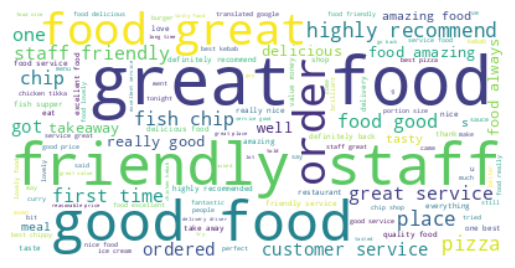

In [37]:
# Word Cloud - Requires additional library: wordcloud
from wordcloud import WordCloud

positive_comments = df["cleaned_review"][df['sentiment_label']  == "positive"]
positive_text = " ".join(comment for comment in positive_comments)
wordcloud = WordCloud(background_color="white", ).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [32]:
df.columns

Index(['comment', 'cleaned_review', 'sentiment_score', 'sentiment_label'], dtype='object')

In [ ]:
# Sentiment Score Distribution (Histogram)
st.subheader('Distribution of Sentiment Scores')
fig, ax = plt.subplots()
sns.histplot(df['sentiment_score'], bins=50, kde=False, ax=ax)
ax.set_title('Distribution of Sentiment Scores')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Number of Reviews')
st.pyplot(fig)

In [39]:
sentiment_counts = df['sentiment_label'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment_label', 'counts']

# Set page title
# st.title('Sentiment Analysis Dashboard')

# # Set subheader for treemap
# st.subheader('Treemap of Sentiment Distribution')

# Creating a treemap using Plotly
fig = px.treemap(sentiment_counts, path=['sentiment_label'], values='counts', title='Treemap of Sentiment Labels')